# Humanoid Dynamics Concepts

## 1 basic concepts
### 质心动力学（Centroidal Dynamics）
bipea robot的inertial movement可以分为平动和转动两部分，分别对应动量守恒和角动量守恒。角动量是质心关于足端接触点产生的角动量。
### 零空间
进行任务分配，比如只动手。矩阵$H$的零空间定义为$$I - pinv(H) H$$
### contact mechanics
contact wrench cone:力螺旋锥 

contact wrench sum: 力螺旋集
### zero-moment point
center of pressure：承压中心在承压点所包围区域内部。
zero-tilting moment point（也叫zero moment point）：接触力的作用是平衡机器人水平方向的力矩（平衡步态下）。在所有接触力中，能找到一个等效接触力，该点处的接触力矩能够平衡其他力矩的水平分量。该点就称为ZMP。根据机器人的运动模式即可计算得到期望的接触力力矩，进而得到期望ZMP。当ZMP在接触区域内时，是稳定的ZMP；否则就是一个不稳定的/fictitious zero-tilting moment point。


## 2 基本模型
### 2.1 拉格朗日力学模型
  状态定义：全状态$q=[r, \phi, \theta]^T$，$r \in R^3$是三轴位移向量，$\phi \in R^3$是base的欧拉角向量，$\theta \in R^n$是各关节的角度。
动力学方程：$$\begin{align}I(q)\ddot{q}+C(q,\dot{q})+G(q)  &= u+E(q)^T \lambda \\ E(q) \dot{q} &= 0 \end{align}$$
其中$I(q)$是广义质量矩阵，$C(q,\dot{q})$是科里奥利项，$G(q)$是重力项，$u \in R^{6+n}$是控制项，$f_p$是约束力，$E(q)$是约束力的雅可比矩阵。约束项在不同的任务阶段会不同。接触约束可以通过多个点的接触方程组，或者两点接触方程+两点向量的方向约束（水平向的约束力和旋转力矩）。


### 2.2 牛顿-欧拉力学模型
状态定义$m$为机器人的总质量；$c$为机器人质心（COM）；$f_i$为机器人所受外力，牛顿力学方程如下，$$m (\ddot{c}+g) = \sum_i f_i$$
总的角动量定义为$$ L = \sum_k (x_k-c) \times m_k \dot{x_k} + I_k \omega_k $$
其中$x_k$为机器人不同构件$k$的位移，$m_k$和$I_k$为机器人不同部分的质量和惯量；$\omega_k$为机器人对应部分的角速度。则根据欧拉方程，有 $$\dot{L} = \sum_i(p_i-c) \times f_i$$。其中$p_i$为$f_i$发生的位置。

压力中心（Center of Pressure，COP）定义为，$$z^{x,y} = \frac{\sum_i f_i^z p_i^{x,y}}{\sum_i f_i^z}$$。由于接触力$f_i^z$的单向有界特性，所以ZMP一定在所有接触点$p_i^{x,y}$的凸闭包中。

对上述压力中心的定义进行重构，得到$$\sum_i(p_i-z)\times f_i = \sum_i (p_i^{x,y}-z^{x,y})\times f_i = 0$$，该式表明压力中心对质心的力矩为0，因此ZOP也称为Zero-Moment Point(ZMP)。



### 2.3 质心动力学模型
《a survey, dynamics of humanoid robots》


质心动力学模型是桨双足系统在惯性坐标系的运动可以分为两部分：质心关于接触点产生的角动量以及机器人整体关于质心的角动量。根据牛顿-欧拉力学模型得到，
$$\begin{bmatrix} \dot{h}_L \\ \dot{h}_A \end{bmatrix} + \begin{bmatrix} mg \\ 0 \end{bmatrix} = \begin{bmatrix} f_C \\ n_C-p_G \times f_C \end{bmatrix}$$
其中，$h_L$和$h_A$分别是linear angular momentum和角动量；$m$是质量，$p_G$是质心位置。$f_C$是总的接触力，$n_C$是关于质心的总接触力矩，$g$是重力加速度。则根据上述关系，可以得到，
$$p_G \times (\dot{h}_L + mg) + \dot{h}_A = n_C$$
根据上述关系，类比建立关于ZMP的旋转动力学方程，得到，
$$(p_G-p_Z) \times (\dot{h}_L + mg) + \dot{h}_A = n_Z$$
做出3个假设：(1) $v \times n_Z = 0$; (2) $\dot{h}_L = m\dot{p}_G$; (3) $v \times \dot{g}_A \approx 0$。则可以得到如下恒等式，
$$ \ddot{p}_G + g = \zeta^2(p_G-p_Z), \quad \zeta^2 = \frac{v^T(\ddot{p}_G) + g}{v^T(p_G-p_Z)}$$
上述方程即为COM-ZMP动力学模型。显然，该式表征机器人的加速度平行于COM到ZMP的直线。

取坐标系z轴与重力方向重合，且$p_G = [x_G, y_G, z_G]$ , $p_Z = [x_z, y_Z, z_Z]$，则有，
$$\ddot{x}_G = \zeta^2(x_G-x_Z) \\ \ddot{y}_G = \zeta^2(y_G-y_Z) \\ \ddot{z}_G + g = \zeta^2(z_G-z_Z)$$
仅考虑机器人系统线性化后的结果（即$\zeta \approx constant$），取x方向的COM-ZMP动力学模型，有，
$$ \frac{d}{dt} \begin{bmatrix} x_G \\ \dot{x}_G \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ \zeta^2 & 0 \end{bmatrix} \begin{bmatrix} x_G \\ \dot{x}_G \end{bmatrix} + \begin{bmatrix} 0 \\ -\zeta^2 \end{bmatrix}x_Z $$ 
将上述系统对角化，得到
$$ \frac{d}{dt} \begin{bmatrix} x_D \\ \dot{x}_C \end{bmatrix} = \begin{bmatrix} \zeta & 0 \\ 0 & -\zeta \end{bmatrix} \begin{bmatrix} x_D \\ \dot{x}_C \end{bmatrix} + \begin{bmatrix} -\zeta \\ \zeta \end{bmatrix}x_Z $$
其中，
$$x_D = x_G + \dot{x}_G/\zeta  \\  x_C = x_G-\dot{x}_G/\zeta$$ 
  #### CCM 与 DCM
上述系统显示存在一个稳定状态和一个不稳定状态，对应的系统特征值分别为$\begin{bmatrix} 1 \\ \zeta \end{bmatrix}$和$\begin{bmatrix} 1 \\ -\zeta \end{bmatrix}$。显然，其中一个收敛，称为Convergent component of motion，而Divergent component of motion是指不收敛的状态。系统相平面图如下，

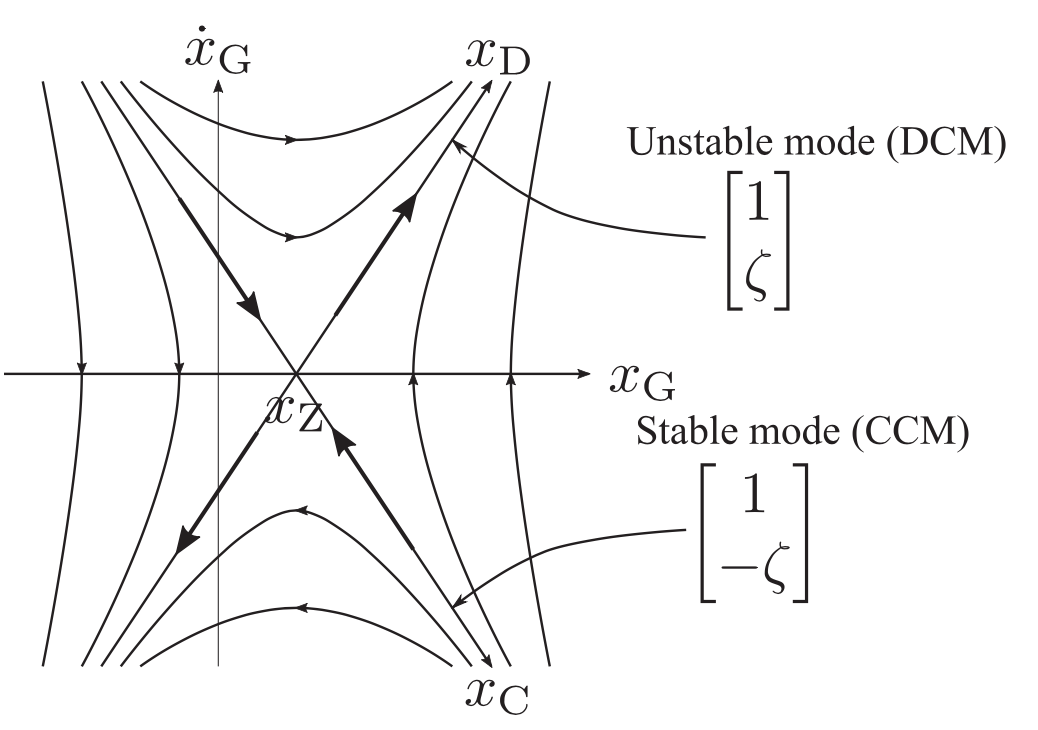
  ###  capture point
根据$\ddot{x}_G = \zeta^2(x_G-x_Z)$并在两边同乘以$\dot{x}_G$，然后对该等式进行积分，则得到，
$$\frac{1}{2}\dot{x}_G^2 - \frac{1}{2}(x_G-x_Z)^2 = E:constant$$
其中$E$被称为orbital energy。根据该等式，可以得到一个ZMP位置控制策略。

那么，如何控制ZMP使得orbital energy为0呢（即从行走到站立）？定义$$x_CP = x_G + \dot{x}_G/\zeta$$
该$X_CP$即被称为capture point，它实质上是extrapolated COM (XCOM)。显然capture point和$x_D$定义相同，但二者在本质上并不同。系统任意时刻的状态$(x_G,\dot{x}_g)$如下图，
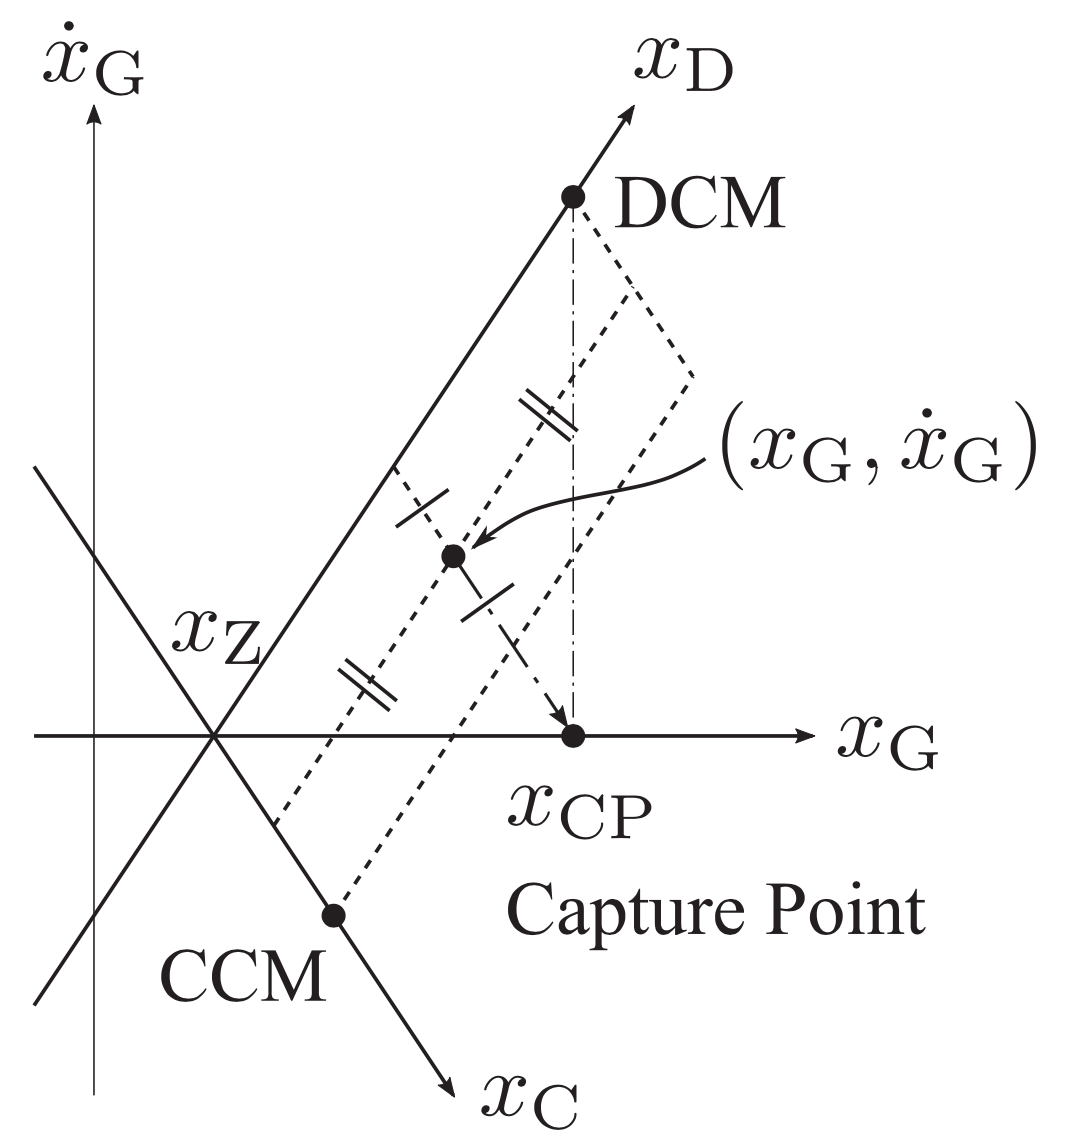

capture point的思想是移动$x_C$轴（使得$x_Z$与$x_CP$重合），以使的当前状态$(x_G,\dot{x}_g)$能够位于该轴上。